In [171]:
#Import your libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import folium
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import v_measure_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [112]:
data = pd.read_csv(r'C:\Users\ABR\Desktop\ProjetFinal\belib_points_de_recharge_clean2.csv')

In [113]:
data.shape

(2073, 26)

In [114]:
data.columns

Index(['ID PDC local_x', 'Statut du Point de charge', 'Arrondissement_x',
       'ID Station local', 'ID Station itinérance', 'Nom station',
       'Code INSEE commune_x', 'Type implantation', 'Nombre point de recharge',
       'Date mise à jour', 'Conditions d'accès', 'Adresse station_x',
       'Paiement CB', 'Tarification', 'Date mise en service',
       'Accessibilité PMR', 'Restriction gabarit', 'Stationnement 2 roues',
       'Puissance max KW', 'Horaires', 'Statut du point de recharge',
       'URL Description Point de charge', 'Heure mise à jour',
       'Type de chargeur', 'latitude', 'longitude'],
      dtype='object')

In [115]:
data['Statut du point de recharge'].unique()

array(['En maintenance', 'Inconnu', 'Disponible', 'Occupé (en charge)'],
      dtype=object)

In [116]:
data['latitude'].dtypes

dtype('float64')

## Elbow method to define number of clusters

In [117]:
data.columns

Index(['ID PDC local_x', 'Statut du Point de charge', 'Arrondissement_x',
       'ID Station local', 'ID Station itinérance', 'Nom station',
       'Code INSEE commune_x', 'Type implantation', 'Nombre point de recharge',
       'Date mise à jour', 'Conditions d'accès', 'Adresse station_x',
       'Paiement CB', 'Tarification', 'Date mise en service',
       'Accessibilité PMR', 'Restriction gabarit', 'Stationnement 2 roues',
       'Puissance max KW', 'Horaires', 'Statut du point de recharge',
       'URL Description Point de charge', 'Heure mise à jour',
       'Type de chargeur', 'latitude', 'longitude'],
      dtype='object')

In [118]:
#X=data[['latitude','longitude']]
X = data[['ID PDC local_x', 'Statut du Point de charge', 
       'ID Station local', 'ID Station itinérance', 'Nom station', 'Type implantation', 'Nombre point de recharge',
       'Date mise à jour', 'Conditions d\'accès', 'Adresse station_x',
       'Paiement CB', 'Tarification', 'Date mise en service',
       'Accessibilité PMR', 'Restriction gabarit', 'Stationnement 2 roues',
       'Puissance max KW', 'Horaires', 'Statut du point de recharge',
       'URL Description Point de charge', 'Heure mise à jour',
       'Type de chargeur']]


In [119]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)

In [121]:
Xdf=pd.DataFrame(X)
Xdf.columns=['ID PDC local_x', 'Statut du Point de charge', 
       'ID Station local', 'ID Station itinérance', 'Nom station', 'Type implantation', 'Nombre point de recharge',
       'Date mise à jour', 'Conditions d\'accès', 'Adresse station_x',
       'Paiement CB', 'Tarification', 'Date mise en service',
       'Accessibilité PMR', 'Restriction gabarit', 'Stationnement 2 roues',
       'Puissance max KW', 'Horaires', 'Statut du point de recharge',
       'URL Description Point de charge', 'Heure mise à jour',
       'Type de chargeur']

# Kmeans

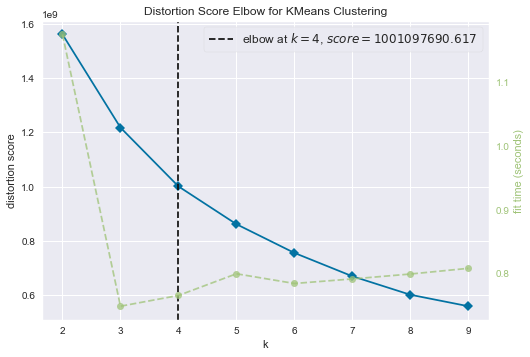

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:
from sklearn.cluster import KMeans

#We check number of clusters for KMeans model
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10)) # range of potential no. of cluster
visualizer.fit(Xdf)
visualizer.poof()

In [122]:
model = KMeans(n_clusters=4)
y_kmeans=model.fit_predict(Xdf)

In [126]:
geodata=data[["latitude", "longitude"]]

In [109]:
Xdf['labels_kmeans']

0       0
1       0
2       0
3       0
4       0
       ..
2068    1
2069    2
2070    2
2071    0
2072    0
Name: labels_kmeans, Length: 2073, dtype: int32

In [127]:
geodata['labels_kmeans'] = model.labels_



C:\Users\ABR\AppData\Local\Temp\ipykernel_2760\3865551799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geodata['labels_kmeans'] = model.labels_


In [213]:
print('Silhouette Coefficient for KMeans is', silhouette_score(Xdf, geodata["labels_kmeans"]))

Silhouette Coefficient for KMeans is 0.25543079508113153


In [212]:
print('Calinski_Harabasz_score Coefficient for KMeans is', calinski_harabasz_score(Xdf,geodata["labels_kmeans"]))

Calinski_Harabasz_score Coefficient for KMeans is 846.1339236964329


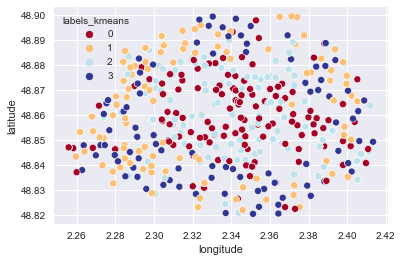

In [129]:
sns.set_style('darkgrid')
sns.scatterplot(data=geodata, x='longitude', y='latitude', hue='labels_kmeans', palette='RdYlBu')
plt.show()

# DBSCAN

In [130]:
dbscan = DBSCAN(eps=0.1, min_samples=5,n_jobs=-1)
dbscan.fit(Xdf)
y_dbscan = dbscan.fit_predict(Xdf)
y_dbscan

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

C:\Users\ABR\AppData\Local\Temp\ipykernel_2760\2854146002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geodata['dbscan_label'] =dbscan.labels_


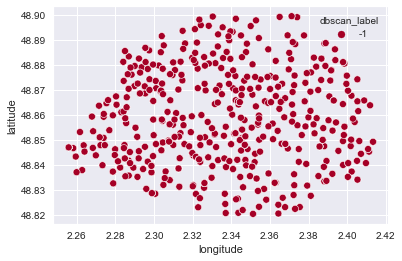

In [131]:
geodata['dbscan_label'] =dbscan.labels_

sns.set_style('darkgrid')
sns.scatterplot(data=geodata, x='longitude', y='latitude', hue='dbscan_label', palette='RdYlBu')
plt.show()

In [211]:
print('Silhouette Coefficient for DBSCAN is', silhouette_score(Xdf, geodata['dbscan_label']))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

# Agglomerative Clustering

In [133]:
from sklearn.cluster import AgglomerativeClustering

In [134]:
cluster_agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_agg=cluster_agg.fit_predict(Xdf)

In [135]:
geodata['agg_labels'] =cluster_agg.labels_

C:\Users\ABR\AppData\Local\Temp\ipykernel_2760\2804411917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geodata['agg_labels'] =cluster_agg.labels_


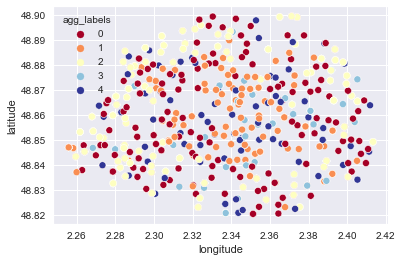

In [136]:
sns.set_style('darkgrid')
sns.scatterplot(data=geodata, x='longitude', y='latitude', hue='agg_labels', palette='RdYlBu')
plt.show()

In [137]:
print('Silhouette Coefficient for agglomerativClustering is', silhouette_score(Xdf, geodata["agg_labels"]))

Silhouette Coefficient for agglomerativClustering is 0.2078761171119166


In [210]:
print('Calinski_Harabasz_score Coefficient for agglomerativClustering is', calinski_harabasz_score(Xdf,geodata["agg_labels"]))

Calinski_Harabasz_score Coefficient for agglomerativClustering is 645.2621461879243


# SpectralClustering

In [138]:
from sklearn.cluster import SpectralClustering

In [144]:
clustering = SpectralClustering(n_clusters=4,
          assign_labels='discretize',
             random_state=0).fit(Xdf)

c:\Users\ABR\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [146]:
geodata["sc_labels"]=clustering.labels_

C:\Users\ABR\AppData\Local\Temp\ipykernel_2760\2865598410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geodata["sc_labels"]=clustering.labels_


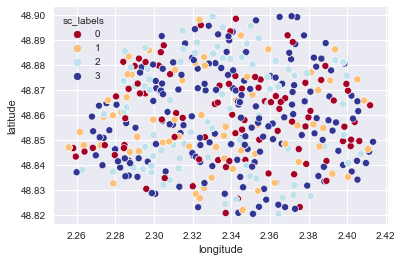

In [147]:
sns.set_style('darkgrid')
sns.scatterplot(data=geodata, x='longitude', y='latitude', hue='sc_labels', palette='RdYlBu')
plt.show()

In [184]:
print('Silhouette Coefficient for SpectralClustering is', silhouette_score(Xdf, geodata["sc_labels"]))

Silhouette Coefficient for SpectralClustering is -0.017313956418175992


In [209]:
print('Calinski_Harabasz_score Coefficient for SpectralClustering is:  ', calinski_harabasz_score(Xdf,geodata["sc_labels"]))

Calinski_Harabasz_score Coefficient for SpectralClustering is:   1.757048675992082


# OPTICS

In [149]:
from sklearn.cluster import OPTICS

In [150]:
clustering = OPTICS(min_samples=2).fit(Xdf)


In [151]:
geodata["opt_labels"]=clustering.labels_

C:\Users\ABR\AppData\Local\Temp\ipykernel_2760\3598200104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geodata["opt_labels"]=clustering.labels_


In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(data=geodata, x='longitude', y='latitude', hue='b_labels', palette='RdYlBu')
plt.show()

In [189]:
print('Silhouette Coefficient for Optics is', silhouette_score(Xdf, geodata["opt_labels"]))

Silhouette Coefficient for Optics is 0.005064916487244806


In [208]:
print('Calinski_Harabasz_score Coefficient for Optics is:  ', calinski_harabasz_score(Xdf,geodata["opt_labels"]))

Calinski_Harabasz_score Coefficient for Optics is:   5.97914082183964


# Birch

In [153]:
from sklearn.cluster import Birch

In [154]:
# Creating the BIRCH clustering model
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)

In [157]:
geodata["b_labels"]=clustering.labels_

C:\Users\ABR\AppData\Local\Temp\ipykernel_2760\3701141816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geodata["b_labels"]=clustering.labels_


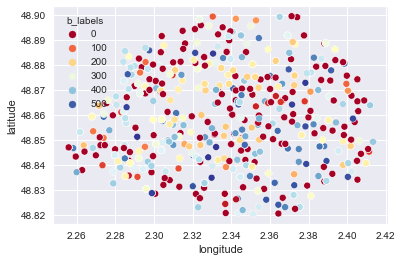

In [158]:
sns.set_style('darkgrid')
sns.scatterplot(data=geodata, x='longitude', y='latitude', hue='b_labels', palette='RdYlBu')
plt.show()

In [192]:
print('Silhouette Coefficient for Birtch is', silhouette_score(Xdf, geodata["b_labels"]))

Silhouette Coefficient for Birtch is 0.005064916487244806


In [207]:
print('Calinski_Harabasz_score Coefficient for Birtch is:  ', calinski_harabasz_score(Xdf,geodata["b_labels"]))

Calinski_Harabasz_score Coefficient for Birtch is:   5.97914082183964


# MeanShift

In [160]:
from sklearn.cluster import MeanShift

In [162]:
clustering = MeanShift(bandwidth=2).fit(Xdf)

In [204]:
geodata["ms_labels"]=clustering.labels_

C:\Users\ABR\AppData\Local\Temp\ipykernel_2760\3769760363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geodata["ms_labels"]=clustering.labels_


In [202]:
geodata["ms_labels"]

0       <bound method MeanShift.predict of MeanShift(b...
1       <bound method MeanShift.predict of MeanShift(b...
2       <bound method MeanShift.predict of MeanShift(b...
3       <bound method MeanShift.predict of MeanShift(b...
4       <bound method MeanShift.predict of MeanShift(b...
                              ...                        
2068    <bound method MeanShift.predict of MeanShift(b...
2069    <bound method MeanShift.predict of MeanShift(b...
2070    <bound method MeanShift.predict of MeanShift(b...
2071    <bound method MeanShift.predict of MeanShift(b...
2072    <bound method MeanShift.predict of MeanShift(b...
Name: ms_labels, Length: 2073, dtype: object

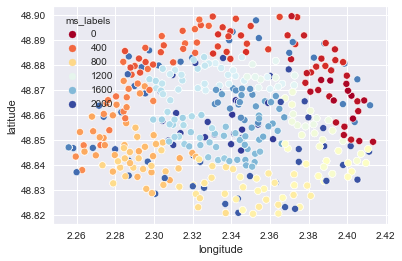

In [205]:
sns.set_style('darkgrid')
sns.scatterplot(data=geodata, x='longitude', y='latitude', hue='ms_labels', palette='RdYlBu')
plt.show()

In [174]:
print('Silhouette Coefficient for MeanShift is', silhouette_score(Xdf, geodata["ms_labels"]))

Silhouette Coefficient for MeanShift is 0.0009495693587448189


In [206]:
print('Calinski_Harabasz_score Coefficient for MeanShift is', calinski_harabasz_score(Xdf,geodata["ms_labels"]))

Calinski_Harabasz_score Coefficient for MeanShift is 676144.5963209594


comparaison

In [197]:
print('Calinski_Harabasz_score Coefficient for KMeans is:  ', calinski_harabasz_score(Xdf,geodata["labels_kmeans"]))
print('Calinski_Harabasz_score Coefficient for agglomerativClustering is:  ', calinski_harabasz_score(Xdf,geodata["agg_labels"]))
print('Calinski_Harabasz_score Coefficient for SpectralClustering is:  ', calinski_harabasz_score(Xdf,geodata["sc_labels"]))
print('Calinski_Harabasz_score Coefficient for Optics is:  ', calinski_harabasz_score(Xdf,geodata["opt_labels"]))
print('Calinski_Harabasz_score Coefficient for Birtch is:  ', calinski_harabasz_score(Xdf,geodata["b_labels"]))
print('Calinski_Harabasz_score Coefficient for MeanShift is', calinski_harabasz_score(Xdf,geodata["ms_labels"]))

Calinski_Harabasz_score Coefficient for KMeans is:   846.1339236964329
Calinski_Harabasz_score Coefficient for agglomerativClustering is:   645.2621461879243
Calinski_Harabasz_score Coefficient for SpectralClustering is:   1.757048675992082
Calinski_Harabasz_score Coefficient for Optics is:   5.97914082183964
Calinski_Harabasz_score Coefficient for Birtch is:   5.97914082183964
Calinski_Harabasz_score Coefficient for MeanShift is 676144.5963209594


In [215]:
print('Silhouette Coefficient for KMeans is', silhouette_score(Xdf, geodata["labels_kmeans"]))
print('Silhouette Coefficient for AgglomerativeClustering is', silhouette_score(Xdf, geodata["agg_labels"]))
print('Silhouette Coefficient for SpectralClustering is', silhouette_score(Xdf, geodata["sc_labels"]))
print('Silhouette Coefficient for Birtch is', silhouette_score(Xdf, geodata["b_labels"]))
print('Silhouette Coefficient for MeanShift is', silhouette_score(Xdf, geodata["ms_labels"]))

Silhouette Coefficient for KMeans is 0.25543079508113153
Silhouette Coefficient for AgglomerativeClustering is 0.2078761171119166
Silhouette Coefficient for SpectralClustering is -0.017313956418175992
Silhouette Coefficient for Birtch is 0.005064916487244806
Silhouette Coefficient for MeanShift is 0.0009495693587448189


Conclusion:
* the clustering of is not dependant of the charging station location but rather depending of the distance from the peripherique